# Predicting Used Car Sale Prices

---

## Problem Description and Initial Data Analysis

- Problem Description
- Evaluation Criteria
- Data Exploration
- Univariate Analysis

### **Problem Description**
We are going to predict the prices of used cars, which can provide valuable information about the current used car market. This will be achieved by creating a predictive model which will use our training dataset to forecast the values of cars in our test dataset. This has many applications in a real-life context. For instance, automotive dealerships can leverage these predictions to optimise their pricing strategies, ensuring competitive yet profitable pricing for their inventory. Online marketplaces such as eBay or CarSales can also use this to enhance user experience by providing estimated values for listed vehicles, facilitating smoother transactions between buyers and sellers.

To evaluate our model's performance, we'll employ the mean absolute percentage error (MAPE) as an evaluation metric. Leveraging this metric enables quantitative assessment of our pricing models' effectiveness in capturing market nuances. This will allow us to continually refine and improve our models, ensuring they remain relevant and reliable in guiding decision-making processes for stakeholders across the automotive industry.

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import regex as re
import seaborn as sns

df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
pd.set_option('display.max_columns', None)

In [6]:
df_train.shape
#df_train.head()

(7000, 39)

In [7]:
df_test.shape
#df_test.head()

(3000, 38)

### **Dataset Variables**

| Variable Kind | Number of Features | Feature Names |
| --- | --- | --- |
| Numeric | 22 | back_legroom, city_fuel_economy, daysonmarket, dealer_zip, engine_displacement, front_legroom, fuel_tank_volume, height, highway_fuel_economy, horsepower, latitude, length, longitude, maximum seating, mileage, power, savings_amount, seller_rating, torque, wheelbase, width, year, |
| Ordinal | 3 | franchise_dealer, is_new, listed_date |
| Nominal | 12 | body_type, city, engine_type, exterior_colour, fuel_type, interior_colour, listing_color, make_name, model_name, transmission, transmission_display, wheel_system |

In [8]:
df_train.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,power,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,2HGFC2F60LH543004,37.4 in,Sedan,Indio,30.0,189,92203,2000.0,I4,Cosmic Blue Metallic,True,42.3 in,12.4 gal,Gasoline,55.7 in,38.0,158.0,Gray,True,33.7576,182.7 in,2020-03-07,BLUE,-116.2890,Honda,5 seats,0.0,Civic,"158 hp @ 6,500 RPM",0.0,4.666667,"138 lb-ft @ 4,200 RPM",CVT,Continuously Variable Transmission,FWD,106.3 in,70.8 in,2020,21605.0
1,3VW2B7AJ7HM347446,38.1 in,Sedan,Houston,28.0,12,77074,1400.0,I4,NaN,True,41.2 in,14.5 gal,Gasoline,57.2 in,38.0,150.0,NaN,False,29.6918,183.3 in,2020-08-30,UNKNOWN,-95.5145,Volkswagen,5 seats,62827.0,Jetta,"150 hp @ 5,000 RPM",148.0,4.250000,"184 lb-ft @ 1,600 RPM",A,Automatic,FWD,104.4 in,70 in,2017,11991.0
2,WBAJA5C36HG897684,36.5 in,Sedan,Vista,24.0,10,92081,2000.0,I4,Dark Graphite Metallic,True,41.4 in,18 gal,Gasoline,58.2 in,34.0,248.0,Black,False,33.1902,194.6 in,2020-09-02,UNKNOWN,-117.2740,BMW,5 seats,36934.0,5 Series,"248 hp @ 5,200 RPM",617.0,4.416667,"258 lb-ft @ 1,500 RPM",A,Automatic,RWD,117.1 in,83.7 in,2017,31974.0
3,2GKFLWEK3F6333294,39.9 in,SUV / Crossover,Ft Myers,20.0,2,33905,2400.0,I4,Onyx Black,False,41.2 in,18 gal,Gasoline,66.3 in,29.0,182.0,clopth,False,26.6778,185.3 in,2020-09-08,BLACK,-81.8100,GMC,5 seats,72880.0,Terrain,"301 hp @ 6,500 RPM",1170.0,NaN,"272 lb-ft @ 4,800 RPM",A,Automatic,AWD,112.5 in,72.8 in,2015,14550.0
4,5N1AT2MV0LC786510,37.9 in,SUV / Crossover,Avon,25.0,195,46123,2500.0,I4,Magnetic Black Pearl,True,43 in,14.5 gal,Gasoline,66.6 in,32.0,170.0,Black (Charcoal),True,39.7632,184.5 in,2020-02-29,BLACK,-86.3645,Nissan,5 seats,NaN,Rogue,"170 hp @ 6,000 RPM",NaN,3.734940,"175 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,AWD,106.5 in,72.4 in,2020,23500.0


In [9]:
df_test.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,power,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year
0,5J8YD4H05LL032532,36.6 in,SUV / Crossover,Escondido,19.0,50,92029,3500.0,V6,Platinum White Pearl,True,41.4 in,19.5 gal,Gasoline,67.4 in,25.0,290.0,Red,True,33.1144,196.2 in,2020-07-24,GRAY,-117.1050,Acura,7 seats,0.0,MDX,"290 hp @ 6,200 RPM",0.0,5.000000,"267 lb-ft @ 4,700 RPM",A,9-Speed Automatic,AWD,111 in,77.7 in,2020
1,KNAE45LC8K6050784,36.4 in,Sedan,Minnetonka,17.0,39,55305,3300.0,V6,Aurora Black,True,42.6 in,15.9 gal,Gasoline,55.1 in,25.0,365.0,Red,False,44.9714,190.2 in,2020-08-03,BLACK,-93.4525,Kia,5 seats,23795.0,Stinger,"365 hp @ 6,000 RPM",707.0,4.538462,"376 lb-ft @ 1,300 RPM",A,8-Speed Automatic,AWD,114.4 in,73.6 in,2019
2,5XYZGDABXCG149606,36.8 in,SUV / Crossover,Albuquerque,20.0,60,87110,2400.0,I4,Pacific Blue Pearl,False,42.6 in,18 gal,Gasoline,67.9 in,25.0,175.0,Brown (beige),False,35.0877,184.1 in,2020-07-19,BLUE,-106.5830,Hyundai,5 seats,150851.0,Santa Fe,"175 hp @ 6,000 RPM",868.0,3.333333,"169 lb-ft @ 3,750 RPM",A,6-Speed Automatic,AWD,106.3 in,74.4 in,2012
3,1G1ZE5ST6HF197903,38.1 in,Sedan,Faribault,27.0,2,55021,1500.0,I4,Cajun Red Tintcoat,True,42 in,13 gal,Gasoline,57.6 in,36.0,160.0,jet black,False,44.2946,193.8 in,2020-09-08,RED,-93.2930,Chevrolet,5 seats,36811.0,Malibu,"160 hp @ 5,700 RPM",25.0,4.725490,"184 lb-ft @ 2,500 RPM",A,6-Speed Automatic,FWD,111.4 in,73 in,2017
4,KL4MMDSL6LB106699,36 in,SUV / Crossover,Laurel,30.0,141,39440,1300.0,I3,WHITE,True,40.9 in,13.2 gal,Gasoline,64.1 in,32.0,150.0,NaN,True,31.7228,171.4 in,2020-04-23,WHITE,-89.1483,Buick,5 seats,5.0,Encore GX,"150 hp @ 5,600 RPM",0.0,4.900000,"174 lb-ft @ 1,500 RPM",A,Automatic,FWD,102.2 in,71.4 in,2020


In the training dataset, there are 39 variables, whereas the test dataset contains 38 variables. Notably, the absence of the 'price' variable distinguishes the test dataset. ‘Price’ is therefore the target variable. Among all the total variables in the dataset, there are 22 numeric variables. This also accounts for string variables where we can extract numeric values from, which includes ‘back_legroom’, ‘front_legroom’, and the ‘height’ variable. Conversely, there are 3 ordinal variables in this dataset. There are also 12 nominal variables. 'Price' was omitted as it is the target variable. 'vin' was ommitted as it is a unique identifier. In the test dataset, there is a total of 2597 missing values, spanning over 26 different variables. The training dataset on the other hand has missing values in 15 different variables, accounting for a total of 1807 missing values. We need to remove these na values to ensure that the data is clean and reliable for analysis.


### **Null Values**

In [10]:
#null values for the train dataset
df_train.isna().sum()

vin                       0
back_legroom              3
body_type                 0
city                      0
city_fuel_economy         0
daysonmarket              0
dealer_zip                0
engine_displacement       0
engine_type               0
exterior_color          110
franchise_dealer         84
front_legroom             3
fuel_tank_volume          3
fuel_type                 0
height                    3
highway_fuel_economy      0
horsepower                0
interior_color          805
is_new                    0
latitude                134
length                    3
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating           3
mileage                 282
model_name                0
power                     8
savings_amount          108
seller_rating           100
torque                    0
transmission             75
transmission_display     75
wheel_system              2
wheelbase           

In [11]:
#null values for the train dataset
df_train.isna().sum()

vin                       0
back_legroom              3
body_type                 0
city                      0
city_fuel_economy         0
daysonmarket              0
dealer_zip                0
engine_displacement       0
engine_type               0
exterior_color          110
franchise_dealer         84
front_legroom             3
fuel_tank_volume          3
fuel_type                 0
height                    3
highway_fuel_economy      0
horsepower                0
interior_color          805
is_new                    0
latitude                134
length                    3
listed_date               0
listing_color             0
longitude                 0
make_name                 0
maximum_seating           3
mileage                 282
model_name                0
power                     8
savings_amount          108
seller_rating           100
torque                    0
transmission             75
transmission_display     75
wheel_system              2
wheelbase           

In [45]:
print('there is ' + str(df_test.isna().sum().sum()) + ' missing values in the test dataset')
print('there is ' + str(df_train.isna().sum().sum()) + ' missing values in the training dataset')

there is 2597 missing values in the test dataset
there is 1807 missing values in the training dataset


### **Univariate Summary Statistics**

Performing univariate analysis reveals interesting insights. The mean year of cars in the dataset is 2017.75, indicating that they were released into the market around 2017-2018, indicating that the listed cars primarily consist of newer models. Moreover, the mode of the 'year' variable is 2020, suggesting that the majority of cars in the dataset were released in that year. When examining the distribution of mileage, 50% of cars recorded a mileage of 11,454 or under, supporting the notion that cars are relatively new. The mean seller rating is 4.27 out of 5 which suggests a generally positive perception among buyers regarding sellers' reliability and overall satisfaction with transactions. Finally, SUVs/Crossovers emerge as the most common car type in the dataset, with 3534 separate listings, reflecting strong consumer demand and market dominance for these vehicles.

In [14]:
#Univariate Summary Statistics
df_train.describe()

,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,savings_amount,seller_rating,year,price
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6866.000000,7000.000000,6718.000000,6892.000000,6900.000000,7000.000000,7000.000000
mean,21.497429,75.878571,50472.137714,2881.928571,28.661714,245.218429,36.957835,-90.594488,31088.643049,551.306152,4.274146,2017.746857,28851.277693
std,4.857918,105.594450,27196.771983,1206.612725,5.658987,87.436127,5.027006,13.826897,44033.494511,929.364379,0.517830,3.608016,17582.731720
min,10.000000,0.000000,1089.000000,1000.000000,13.000000,78.000000,24.571900,-123.205000,0.000000,0.000000,1.000000,1990.000000,650.000000
25%,18.000000,15.000000,30047.000000,2000.000000,24.000000,174.000000,33.484625,-96.951600,6.000000,0.000000,4.000000,2017.000000,17986.500000
50%,21.000000,36.000000,47893.000000,2500.000000,28.000000,243.000000,37.808200,-86.972800,11454.000000,0.000000,4.355556,2019.000000,25387.000000
75%,25.000000,80.000000,76457.000000,3500.000000,33.000000,300.000000,40.925750,-80.704600,43428.250000,834.000000,4.615385,2020.000000,36992.000000
max,70.000000,1259.000000,99362.000000,6800.000000,75.000000,797.000000,48.861600,-67.997400,285788.000000,12596.000000,5.000000,2021.000000,350000.000000


In [15]:
#Mode of year variable
df_train['year'].mode()

0    2020
dtype: int64

In [16]:
#Categorical Univariate Summary Statistics
df_train['body_type'].value_counts()

SUV / Crossover    3534
Sedan              1846
Pickup Truck        905
Minivan             233
Coupe               166
Hatchback           135
Wagon                89
Convertible          62
Van                  30
Name: body_type, dtype: int64

---

## Data Cleaning, Missing Observations and Feature Engineering

### **Cleaning Dataset**

In [17]:
#Regular Expressions to Identify Text (re is regular expressions)
def extract_numerical_value(text):
    if isinstance(text, str):
        match = re.search(r"[-+]?\d*\.\d+|\d+", text)
        return float(match.group()) if match else None
    return text

#Cleaning numerical values in training and test dataset
df_train_new = df_train.copy()
df_test_new = df_test.copy()
columns_to_clean = ['back_legroom', 'front_legroom', 'height', 'length', 'maximum_seating', 'wheelbase', 'width', 'fuel_tank_volume']

for column in columns_to_clean:
    df_train_new[column] = df_train_new[column].apply(extract_numerical_value)
    df_test_new[column] = df_test_new[column].apply(extract_numerical_value)

df_train_new[columns_to_clean] = df_train_new[columns_to_clean].apply(pd.to_numeric)
df_test_new[columns_to_clean] = df_test_new[columns_to_clean].apply(pd.to_numeric)

The code defines a function named  extract numerical values from text using regular expressions. In the height column, it will allow us to remove the 'in' that was initially present, and only extract the numeric value in each entry. We then cleaned the numerical values in specified columns of training and test datasets, and converted them to float type. We then applied a numeric conversion into the dataset, which means that when we apply .info() on the dataset, it will be recorded as a numeric value.

In [18]:
df_train_new.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,power,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,2HGFC2F60LH543004,37.4,Sedan,Indio,30.0,189,92203,2000.0,I4,Cosmic Blue Metallic,True,42.3,12.4,Gasoline,55.7,38.0,158.0,Gray,True,33.7576,182.7,2020-03-07,BLUE,-116.2890,Honda,5.0,0.0,Civic,"158 hp @ 6,500 RPM",0.0,4.666667,"138 lb-ft @ 4,200 RPM",CVT,Continuously Variable Transmission,FWD,106.3,70.8,2020,21605.0
1,3VW2B7AJ7HM347446,38.1,Sedan,Houston,28.0,12,77074,1400.0,I4,NaN,True,41.2,14.5,Gasoline,57.2,38.0,150.0,NaN,False,29.6918,183.3,2020-08-30,UNKNOWN,-95.5145,Volkswagen,5.0,62827.0,Jetta,"150 hp @ 5,000 RPM",148.0,4.250000,"184 lb-ft @ 1,600 RPM",A,Automatic,FWD,104.4,70.0,2017,11991.0
2,WBAJA5C36HG897684,36.5,Sedan,Vista,24.0,10,92081,2000.0,I4,Dark Graphite Metallic,True,41.4,18.0,Gasoline,58.2,34.0,248.0,Black,False,33.1902,194.6,2020-09-02,UNKNOWN,-117.2740,BMW,5.0,36934.0,5 Series,"248 hp @ 5,200 RPM",617.0,4.416667,"258 lb-ft @ 1,500 RPM",A,Automatic,RWD,117.1,83.7,2017,31974.0
3,2GKFLWEK3F6333294,39.9,SUV / Crossover,Ft Myers,20.0,2,33905,2400.0,I4,Onyx Black,False,41.2,18.0,Gasoline,66.3,29.0,182.0,clopth,False,26.6778,185.3,2020-09-08,BLACK,-81.8100,GMC,5.0,72880.0,Terrain,"301 hp @ 6,500 RPM",1170.0,NaN,"272 lb-ft @ 4,800 RPM",A,Automatic,AWD,112.5,72.8,2015,14550.0
4,5N1AT2MV0LC786510,37.9,SUV / Crossover,Avon,25.0,195,46123,2500.0,I4,Magnetic Black Pearl,True,43.0,14.5,Gasoline,66.6,32.0,170.0,Black (Charcoal),True,39.7632,184.5,2020-02-29,BLACK,-86.3645,Nissan,5.0,NaN,Rogue,"170 hp @ 6,000 RPM",NaN,3.734940,"175 lb-ft @ 4,400 RPM",CVT,Continuously Variable Transmission,AWD,106.5,72.4,2020,23500.0


In [19]:
df_test_new.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,power,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year
0,5J8YD4H05LL032532,36.6,SUV / Crossover,Escondido,19.0,50,92029,3500.0,V6,Platinum White Pearl,True,41.4,19.5,Gasoline,67.4,25.0,290.0,Red,True,33.1144,196.2,2020-07-24,GRAY,-117.1050,Acura,7.0,0.0,MDX,"290 hp @ 6,200 RPM",0.0,5.000000,"267 lb-ft @ 4,700 RPM",A,9-Speed Automatic,AWD,111.0,77.7,2020
1,KNAE45LC8K6050784,36.4,Sedan,Minnetonka,17.0,39,55305,3300.0,V6,Aurora Black,True,42.6,15.9,Gasoline,55.1,25.0,365.0,Red,False,44.9714,190.2,2020-08-03,BLACK,-93.4525,Kia,5.0,23795.0,Stinger,"365 hp @ 6,000 RPM",707.0,4.538462,"376 lb-ft @ 1,300 RPM",A,8-Speed Automatic,AWD,114.4,73.6,2019
2,5XYZGDABXCG149606,36.8,SUV / Crossover,Albuquerque,20.0,60,87110,2400.0,I4,Pacific Blue Pearl,False,42.6,18.0,Gasoline,67.9,25.0,175.0,Brown (beige),False,35.0877,184.1,2020-07-19,BLUE,-106.5830,Hyundai,5.0,150851.0,Santa Fe,"175 hp @ 6,000 RPM",868.0,3.333333,"169 lb-ft @ 3,750 RPM",A,6-Speed Automatic,AWD,106.3,74.4,2012
3,1G1ZE5ST6HF197903,38.1,Sedan,Faribault,27.0,2,55021,1500.0,I4,Cajun Red Tintcoat,True,42.0,13.0,Gasoline,57.6,36.0,160.0,jet black,False,44.2946,193.8,2020-09-08,RED,-93.2930,Chevrolet,5.0,36811.0,Malibu,"160 hp @ 5,700 RPM",25.0,4.725490,"184 lb-ft @ 2,500 RPM",A,6-Speed Automatic,FWD,111.4,73.0,2017
4,KL4MMDSL6LB106699,36.0,SUV / Crossover,Laurel,30.0,141,39440,1300.0,I3,WHITE,True,40.9,13.2,Gasoline,64.1,32.0,150.0,NaN,True,31.7228,171.4,2020-04-23,WHITE,-89.1483,Buick,5.0,5.0,Encore GX,"150 hp @ 5,600 RPM",0.0,4.900000,"174 lb-ft @ 1,500 RPM",A,Automatic,FWD,102.2,71.4,2020


### **Feature Creation**

In [20]:
#max torque and torque rpm from torque variable
df_train_new['max_torque'] = df_train_new['torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df_test_new['max_torque'] = df_test_new['torque'].str.extract(r'(\d+\.?\d*)').astype(float)
df_train_new['torque_rpm'] = df_train_new['torque'].str.extract(r'@ (\d+[,\.]?\d*) RPM').replace(',', '', regex=True).astype(float)
df_test_new['torque_rpm'] = df_test_new['torque'].str.extract(r'@ (\d+[,\.]?\d*) RPM').replace(',', '', regex=True).astype(float)

#max power and power rpm from power variable
df_train_new['max_power'] = df_train_new['power'].str.extract(r'(\d+\.?\d*)').astype(float)
df_test_new['max_power'] = df_test_new['power'].str.extract(r'(\d+\.?\d*)').astype(float)
df_train_new['power_rpm'] = df_train_new['power'].str.extract(r'@ (\d+[,\.]?\d*) RPM').replace(',', '', regex=True).astype(float)
df_test_new['power_rpm'] = df_test_new['power'].str.extract(r'@ (\d+[,\.]?\d*) RPM').replace(',', '', regex=True).astype(float)

#dropping torque and power columns
df_train_new = df_train_new.drop(columns=['torque', 'power'])
df_test_new = df_test_new.drop(columns=['torque', 'power'])

#car age
current_year = 2024
df_train_new['car_age'] = current_year - df_train['year']
df_test_new['car_age'] = current_year - df_test['year']

We generated five additional numerical features derived from the original dataset. We focused on the information encoded in the torque variable, originally represented as a string. We isolated the numeric values using the str.extract method. Subsequently, we converted these extracted numeric values into floating-point format. From this transformation, we derived two distinct variables: max_torque and torque_rpm. For instance, considering an entry in the dataset where the torque column initially displayed "138 lb-ft @ 4,200 RPM", we separated the numerical values to obtain "138.0" and "4200.0" for max_torque and torque_rpm respectively. A similar process was made when we extracted numeric values in the 'power' variable, and separated it into two separate features titled max_power and power_rpm. Creating these 4 features can allow us to determine whether these features are good predictors for the target variable, price.

We also created a new variable called 'car age', which subtracts the 'year' value of each listed car in the dataset by the current year. Creating this numeric feature could allow us to predict whether the age of the car is a good predictor for price.

In [21]:
df_train_new.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,savings_amount,seller_rating,transmission,transmission_display,wheel_system,wheelbase,width,year,price,max_torque,torque_rpm,max_power,power_rpm,car_age
0,2HGFC2F60LH543004,37.4,Sedan,Indio,30.0,189,92203,2000.0,I4,Cosmic Blue Metallic,True,42.3,12.4,Gasoline,55.7,38.0,158.0,Gray,True,33.7576,182.7,2020-03-07,BLUE,-116.2890,Honda,5.0,0.0,Civic,0.0,4.666667,CVT,Continuously Variable Transmission,FWD,106.3,70.8,2020,21605.0,138.0,4200.0,158.0,6500.0,4
1,3VW2B7AJ7HM347446,38.1,Sedan,Houston,28.0,12,77074,1400.0,I4,NaN,True,41.2,14.5,Gasoline,57.2,38.0,150.0,NaN,False,29.6918,183.3,2020-08-30,UNKNOWN,-95.5145,Volkswagen,5.0,62827.0,Jetta,148.0,4.250000,A,Automatic,FWD,104.4,70.0,2017,11991.0,184.0,1600.0,150.0,5000.0,7
2,WBAJA5C36HG897684,36.5,Sedan,Vista,24.0,10,92081,2000.0,I4,Dark Graphite Metallic,True,41.4,18.0,Gasoline,58.2,34.0,248.0,Black,False,33.1902,194.6,2020-09-02,UNKNOWN,-117.2740,BMW,5.0,36934.0,5 Series,617.0,4.416667,A,Automatic,RWD,117.1,83.7,2017,31974.0,258.0,1500.0,248.0,5200.0,7
3,2GKFLWEK3F6333294,39.9,SUV / Crossover,Ft Myers,20.0,2,33905,2400.0,I4,Onyx Black,False,41.2,18.0,Gasoline,66.3,29.0,182.0,clopth,False,26.6778,185.3,2020-09-08,BLACK,-81.8100,GMC,5.0,72880.0,Terrain,1170.0,NaN,A,Automatic,AWD,112.5,72.8,2015,14550.0,272.0,4800.0,301.0,6500.0,9
4,5N1AT2MV0LC786510,37.9,SUV / Crossover,Avon,25.0,195,46123,2500.0,I4,Magnetic Black Pearl,True,43.0,14.5,Gasoline,66.6,32.0,170.0,Black (Charcoal),True,39.7632,184.5,2020-02-29,BLACK,-86.3645,Nissan,5.0,NaN,Rogue,NaN,3.734940,CVT,Continuously Variable Transmission,AWD,106.5,72.4,2020,23500.0,175.0,4400.0,170.0,6000.0,4


In [22]:
df_test_new.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,model_name,savings_amount,seller_rating,transmission,transmission_display,wheel_system,wheelbase,width,year,max_torque,torque_rpm,max_power,power_rpm,car_age
0,5J8YD4H05LL032532,36.6,SUV / Crossover,Escondido,19.0,50,92029,3500.0,V6,Platinum White Pearl,True,41.4,19.5,Gasoline,67.4,25.0,290.0,Red,True,33.1144,196.2,2020-07-24,GRAY,-117.1050,Acura,7.0,0.0,MDX,0.0,5.000000,A,9-Speed Automatic,AWD,111.0,77.7,2020,267.0,4700.0,290.0,6200.0,4
1,KNAE45LC8K6050784,36.4,Sedan,Minnetonka,17.0,39,55305,3300.0,V6,Aurora Black,True,42.6,15.9,Gasoline,55.1,25.0,365.0,Red,False,44.9714,190.2,2020-08-03,BLACK,-93.4525,Kia,5.0,23795.0,Stinger,707.0,4.538462,A,8-Speed Automatic,AWD,114.4,73.6,2019,376.0,1300.0,365.0,6000.0,5
2,5XYZGDABXCG149606,36.8,SUV / Crossover,Albuquerque,20.0,60,87110,2400.0,I4,Pacific Blue Pearl,False,42.6,18.0,Gasoline,67.9,25.0,175.0,Brown (beige),False,35.0877,184.1,2020-07-19,BLUE,-106.5830,Hyundai,5.0,150851.0,Santa Fe,868.0,3.333333,A,6-Speed Automatic,AWD,106.3,74.4,2012,169.0,3750.0,175.0,6000.0,12
3,1G1ZE5ST6HF197903,38.1,Sedan,Faribault,27.0,2,55021,1500.0,I4,Cajun Red Tintcoat,True,42.0,13.0,Gasoline,57.6,36.0,160.0,jet black,False,44.2946,193.8,2020-09-08,RED,-93.2930,Chevrolet,5.0,36811.0,Malibu,25.0,4.725490,A,6-Speed Automatic,FWD,111.4,73.0,2017,184.0,2500.0,160.0,5700.0,7
4,KL4MMDSL6LB106699,36.0,SUV / Crossover,Laurel,30.0,141,39440,1300.0,I3,WHITE,True,40.9,13.2,Gasoline,64.1,32.0,150.0,NaN,True,31.7228,171.4,2020-04-23,WHITE,-89.1483,Buick,5.0,5.0,Encore GX,0.0,4.900000,A,Automatic,FWD,102.2,71.4,2020,174.0,1500.0,150.0,5600.0,4


### **Imputing Missing Values**

In [23]:
df_train_new1 = df_train_new.copy()
df_test_new1 = df_test_new.copy()

df_train_new1 = df_train_new1.replace([np.inf, -np.inf], np.nan)
df_test_new1 = df_test_new1.replace([np.inf, -np.inf], np.nan)

#creating variable to remove missing values by feature type
numeric_columns_train = df_train_new1.select_dtypes(include=[float, int]).columns
numeric_columns_test = df_test_new1.select_dtypes(include=[float, int]).columns
categorical_columns_train = df_train_new1.select_dtypes(include=[object]).columns
categorical_columns_test = df_test_new1.select_dtypes(include=[object]).columns

#filling na of numeric values with mean
df_train_new1[numeric_columns_train] = df_train_new1[numeric_columns_train].fillna(df_train_new1[numeric_columns_train].mean())
df_test_new1[numeric_columns_test] = df_test_new1[numeric_columns_test].fillna(df_test_new1[numeric_columns_test].mean())

#filling na of categorical variables with mode
df_train_new1[categorical_columns_train] = df_train_new1[categorical_columns_train].fillna(df_train[categorical_columns_train].mode().iloc[0])
df_test_new1[categorical_columns_test] = df_test_new1[categorical_columns_test].fillna(df_test[categorical_columns_test].mode().iloc[0])

In this code, we created a copy of the training and test dataset titled df_train_new1 and df_test_new1 respectively. This will allow us to preserve the original dataset's integrity, and make it easier to debug any issues more easily as we can track the source of the issue. For the numeric columns, we removed the na values using the mean. For the categorical variables, we used the mode to eliminate the na values.

In [24]:
df_train_new1.isna().sum()

vin                     0
back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
dealer_zip              0
engine_displacement     0
engine_type             0
exterior_color          0
franchise_dealer        0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
height                  0
highway_fuel_economy    0
horsepower              0
interior_color          0
is_new                  0
latitude                0
length                  0
listed_date             0
listing_color           0
longitude               0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
savings_amount          0
seller_rating           0
transmission            0
transmission_display    0
wheel_system            0
wheelbase               0
width                   0
year                    0
price                   0
max_torque              0
torque_rpm  

In [25]:
df_test_new1.isna().sum()

vin                     0
back_legroom            0
body_type               0
city                    0
city_fuel_economy       0
daysonmarket            0
dealer_zip              0
engine_displacement     0
engine_type             0
exterior_color          0
franchise_dealer        0
front_legroom           0
fuel_tank_volume        0
fuel_type               0
height                  0
highway_fuel_economy    0
horsepower              0
interior_color          0
is_new                  0
latitude                0
length                  0
listed_date             0
listing_color           0
longitude               0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
savings_amount          0
seller_rating           0
transmission            0
transmission_display    0
wheel_system            0
wheelbase               0
width                   0
year                    0
max_torque              0
torque_rpm              0
max_power   

After conducting this, the isna().sum() function shows that we have successfully removed the na values from all of the variables. This will allow us to conduct further analysis on a clean dataset.

### **Encoding Categorical Variables**

In [26]:
df_train_new2 = df_train_new1.copy()
df_test_new2 = df_test_new1.copy()

In [27]:
#encoding ordinal variables - for franchise_dealer and is_new features. 1 is true, 0 is false
boolean_columns = df_train_new2.select_dtypes(include=bool).columns, df_test_new2.select_dtypes(include=bool).columns

for col in boolean_columns:
    df_train_new2[col] = df_train_new2[col].astype(int)
    df_test_new2[col] = df_test_new2[col].astype(int)


In our analysis of ordinal variables like franchise_dealer and is_new, we have recognized their boolean nature. To put them into our model, we've encoded them into integer format, where 1 represents true and 0 represents false. This encoding method streamlines computational processes and enhances statistical analyses, ensuring optimal utilization of these variables in our model.

In [28]:
#encoding nominal variables in training dataset
# Body type
dummy_body_types_train = pd.get_dummies(df_train_new2['body_type'].apply(lambda x: 'suv/crossover' if 'suv / crossover' in x.lower() else x.strip()) \
                                        .apply(lambda x: 'pickup_truck' if 'pickup truck' in x.lower() else x.strip()) \
                                        .apply(lambda x: 'sedan' if 'sedan' in x.lower() else x.strip()) \
                                        .apply(lambda x: 'minivan' if 'minivan' in x.lower() else x.strip()) \
                                        .apply(lambda x: 'coupe' if 'coupe' in x.lower() else x.strip()) \
                                        .apply(lambda x: x if x.strip() in ['suv/crossover', 'sedan', 'pickup_truck', 'minivan', 'coupe'] else 'bodytype_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_body_types_train], axis=1)

# Engine Type
dummy_engine_types_train = pd.get_dummies(df_train_new2['engine_type'].apply(lambda x: 'engine_I4' if 'i4' in x.lower() else x.strip()) \
                                          .apply(lambda x: 'engine_V6' if 'v6' in x.lower() else x.strip()) \
                                          .apply(lambda x: 'engine_V8' if 'v8' in x.lower() else x.strip()) \
                                          .apply(lambda x: 'engine_H4' if 'h4' in x.lower() else x.strip()) \
                                          .apply(lambda x: 'engine_I3' if 'i3' in x.lower() else x.strip()) \
                                          .apply(lambda x: x.strip() if x.strip() in ['engine_I4', 'engine_V6', 'engine_V8', 'engine_H4', 'engine_I3'] else 'engine_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_engine_types_train], axis=1)

# Exterior Colors
dummy_exterior_colors_train = pd.get_dummies(df_train_new2['exterior_color'].apply(lambda x: 'exterior_black' if 'black' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'exterior_white' if 'white' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'exterior_gray' if 'gray' in x.lower() or 'grey' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'exterior_silver' if 'silver' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'exterior_blue' if 'blue' in x.lower() else x.strip()) \
                                            .apply(lambda x: x.strip() if x.strip() in ['exterior_black', 'exterior_white', 'exterior_gray', 'exterior_silver', 'exterior_blue'] else 'exterior_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_exterior_colors_train], axis=1)

# Fuel Type
dummy_fuel_type_train = pd.get_dummies(df_train_new2['fuel_type'].apply(lambda x: 'fuel_gasoline' if 'gasoline' in x.lower() else x.strip()) \
                                      .apply(lambda x: 'fuel_flexfuel' if 'flex fuel vehicle' in x.lower() else x.strip()) \
                                      .apply(lambda x: 'fuel_diesel' if 'diesel' in x.lower() else x.strip()) \
                                      .apply(lambda x: 'fuel_biodiesel' if 'biodiesel' in x.lower() and 'diesel' not in x.lower() else x.strip()) \
                                      .apply(lambda x: 'fuel_hybrid' if 'hybrid' in x.lower() else x.strip()) \
                                      .apply(lambda x: x.strip() if x.strip() in ['fuel_gasoline', 'fuel_flexfuel', 'fuel_diesel', 'fuel_biodiesel', 'fuel_hybrid'] else 'fuel_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_fuel_type_train], axis=1)

# Interior Colors
dummy_interior_colors_train = pd.get_dummies(df_train_new2['interior_color'].apply(lambda x: 'interior_black' if 'black' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'interior_white' if 'white' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'interior_gray' if 'gray' in x.lower() or 'grey' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'interior_brown' if 'brown' in x.lower() else x.strip()) \
                                            .apply(lambda x: 'interior_blue' if 'blue' in x.lower() else x.strip()) \
                                            .apply(lambda x: x.strip() if x.strip() in ['interior_black', 'interior_white', 'interior_gray', 'interior_brown', 'interior_blue'] else 'interior_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_interior_colors_train], axis=1)

# City
dummy_city_train = pd.get_dummies(df_train_new2['city'].apply(lambda x: 'houston' if 'houston' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'miami' if 'miami' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'columbus' if 'columbus' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'san_antonio' if 'san antonio' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'tampa' if 'tampa' in x.lower() else x.strip()) \
                                  .apply(lambda x: x.strip() if x.strip() in ['houston', 'miami', 'columbus', 'san_antonio', 'tampa'] else 'city_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_city_train], axis=1)

# Make Name
dummy_makename_train = pd.get_dummies(df_train_new2['make_name'].apply(lambda x: 'ford' if 'ford' in x.lower() else x.strip()) \
                                     .apply(lambda x: 'chevrolet' if 'chevrolet' in x.lower() else x.strip()) \
                                     .apply(lambda x: 'nissan' if 'nissan' in x.lower() else x.strip()) \
                                     .apply(lambda x: 'honda' if 'honda' in x.lower() else x.strip()) \
                                     .apply(lambda x: 'jeep' if 'jeep' in x.lower() else x.strip()) \
                                     .apply(lambda x: x.strip() if x.strip() in ['ford', 'chevrolet', 'nissan', 'honda', 'jeep'] else 'carmake_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_makename_train], axis=1)

# Wheel System
dummy_wheel_train = pd.get_dummies(df_train_new2['wheel_system'].apply(lambda x: 'wheel_fwd' if 'fwd' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'wheel_awd' if 'awd' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'wheel_4wd' if '4wd' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'wheel_rwd' if 'rwd' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'wheel_4x2' if '4x2' in x.lower() else x.strip()) \
                                  .apply(lambda x: x.strip() if x.strip() in ['wheel_fwd', 'wheel_awd', 'wheel_4wd', 'wheel_rwd', 'wheel_4x2'] else 'wheel_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_wheel_train], axis=1)

# Model Name
dummy_model_train = pd.get_dummies(df_train_new2['model_name'].apply(lambda x: 'model_f150' if 'f-150' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'model_silverado1500' if 'silverado 1500' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'model_1500' if '1500' in x.lower() and 'silverado' not in x.lower() else x.strip()) \
                                  .apply(lambda x: 'model_rogue' if 'rogue' in x.lower() else x.strip()) \
                                  .apply(lambda x: 'model_crv' if 'cr-v' in x.lower() else x.strip()) \
                                  .apply(lambda x: x.strip() if x.strip() in ['model_f150', 'model_silverado1500', 'model_1500', 'model_rogue', 'model_crv'] else 'model_other')).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_model_train], axis=1)

# Transmission - uses regex
dummy_transmission_train = pd.get_dummies(df_train_new2['transmission'].apply(lambda x: 'transmission_auto' if re.search(r'\ba\b', x.lower()) else x.strip()) \
                                         .apply(lambda x: 'transmission_cvt' if re.search(r'\bcvt\b', x.lower()) else x.strip()) \
                                         .apply(lambda x: 'transmission_manual' if re.search(r'\bm\b', x.lower()) and not re.search(r'\bdual clutch\b', x.lower()) else x.strip()) \
                                         .apply(lambda x: 'transmission_dualclutch' if re.search(r'\bdual clutch\b', x.lower()) else x.strip())).astype(int)
df_train_new2 = pd.concat([df_train_new2, dummy_transmission_train], axis=1)

To do this question, we use dummy variables and the ordinal variables in the training dataset and test dataset separately. From the ordinal categorical variables, we extracted the most common values of each feature and used dummy variables to separate them on the dataset. For instance, in the exterior_color feature, we identified that the 5 most common colors were black, white, gray, silver, and blue when we conducted a value_counts() on the variable. Since the column had entries such as Cosmic Blue Metallic, it was important to just extract the colour from that entry, which in this example is 'blue'. This was done by using .apply(lambda x), which identified 'strings' containing the word blue and combined it into a new variable exterior_blue. This was done for the rest of the common colors in that column, and any colour that didn't match those listed colours were simply put into exterior_other.

A similar process was repeated for the rest of the ordinal features. To encode the transmission variable, we used regular expressions. By employing regular expressions, we could pinpoint specific patterns or keywords within the transmission values. For instance, this allowed us to combine any entries that contained just the letter 'M' into one dummy variable titled transmission_manual.

In [29]:
#encoding nominal variables in test dataset
#Body Type
dummy_body_types_test = pd.get_dummies(df_test_new2['body_type'].apply(lambda x: 'suv/crossover' if 'suv / crossover' in x.lower() else x) \
                                        .apply(lambda x: 'pickup_truck' if 'pickup truck' in x.lower() else x) \
                                        .apply(lambda x: 'sedan' if 'sedan' in x.lower() else x) \
                                        .apply(lambda x: 'minivan' if 'minivan' in x.lower() else x) \
                                        .apply(lambda x: 'coupe' if 'coupe' in x.lower() else x) \
                                        .apply(lambda x: x if x in ['suv/crossover', 'sedan', 'pickup_truck', 'minivan', 'coupe'] else 'bodytype_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_body_types_test], axis=1)

# Engine Type
dummy_engine_types_test = pd.get_dummies(df_test_new2['engine_type'].apply(lambda x: 'engine_I4' if 'i4' in x.lower() else x) \
                                          .apply(lambda x: 'engine_V6' if 'v6' in x.lower() else x) \
                                          .apply(lambda x: 'engine_V8' if 'v8' in x.lower() else x) \
                                          .apply(lambda x: 'engine_H4' if 'h4' in x.lower() else x) \
                                          .apply(lambda x: 'engine_I3' if 'i3' in x.lower() else x) \
                                          .apply(lambda x: x if x in ['engine_I4', 'engine_V6', 'engine_V8', 'engine_H4', 'engine_I3'] else 'engine_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_engine_types_test], axis=1)

# Exterior Colors
dummy_exterior_colors_test = pd.get_dummies(df_test_new2['exterior_color'].apply(lambda x: 'exterior_black' if 'black' in x.lower() else x) \
                                            .apply(lambda x: 'exterior_white' if 'white' in x.lower() else x) \
                                            .apply(lambda x: 'exterior_gray' if 'gray' in x.lower() or 'grey' in x.lower() else x) \
                                            .apply(lambda x: 'exterior_silver' if 'silver' in x.lower() else x) \
                                            .apply(lambda x: 'exterior_blue' if 'blue' in x.lower() else x) \
                                            .apply(lambda x: x if x in ['exterior_black', 'exterior_white', 'exterior_gray', 'exterior_silver', 'exterior_blue'] else 'exterior_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_exterior_colors_test], axis=1)

# Fuel Type
dummy_fuel_type_test = pd.get_dummies(df_test_new2['fuel_type'].apply(lambda x: 'fuel_gasoline' if 'gasoline' in x.lower() else x) \
                                      .apply(lambda x: 'fuel_flexfuel' if 'flex fuel vehicle' in x.lower() else x) \
                                      .apply(lambda x: 'fuel_diesel' if 'diesel' in x.lower() else x) \
                                      .apply(lambda x: 'fuel_biodiesel' if 'biodiesel' in x.lower() and 'diesel' not in x.lower() else x) \
                                      .apply(lambda x: 'fuel_hybrid' if 'hybrid' in x.lower() else x) \
                                      .apply(lambda x: x if x in ['fuel_gasoline', 'fuel_flexfuel', 'fuel_diesel', 'fuel_biodiesel', 'fuel_hybrid'] else 'fuel_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_fuel_type_test], axis=1)

# Interior Colors
dummy_interior_colors_test = pd.get_dummies(df_test_new2['interior_color'].apply(lambda x: 'interior_black' if 'black' in x.lower() else x) \
                                            .apply(lambda x: 'interior_white' if 'white' in x.lower() else x) \
                                            .apply(lambda x: 'interior_gray' if 'gray' in x.lower() or 'grey' in x.lower() else x) \
                                            .apply(lambda x: 'interior_brown' if 'brown' in x.lower() else x) \
                                            .apply(lambda x: 'interior_blue' if 'blue' in x.lower() else x) \
                                            .apply(lambda x: x if x in ['interior_black', 'interior_white', 'interior_gray', 'interior_brown', 'interior_blue'] else 'interior_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_interior_colors_test], axis=1)

# City
dummy_city_test = pd.get_dummies(df_test_new2['city'].apply(lambda x: 'houston' if 'houston' in x.lower() else x) \
                                  .apply(lambda x: 'miami' if 'miami' in x.lower() else x) \
                                  .apply(lambda x: 'columbus' if 'columbus' in x.lower() else x) \
                                  .apply(lambda x: 'san_antonio' if 'san antonio' in x.lower() else x) \
                                  .apply(lambda x: 'tampa' if 'tampa' in x.lower() else x) \
                                  .apply(lambda x: x if x in ['houston', 'miami', 'columbus', 'san_antonio', 'tampa'] else 'city_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_city_test], axis=1)

# Make Name
dummy_makename_test = pd.get_dummies(df_test_new2['make_name'].apply(lambda x: 'ford' if 'ford' in x.lower() else x) \
                                     .apply(lambda x: 'chevrolet' if 'chevrolet' in x.lower() else x) \
                                     .apply(lambda x: 'nissan' if 'nissan' in x.lower() else x) \
                                     .apply(lambda x: 'honda' if 'honda' in x.lower() else x) \
                                     .apply(lambda x: 'jeep' if 'jeep' in x.lower() else x) \
                                     .apply(lambda x: x if x in ['ford', 'chevrolet', 'nissan', 'honda', 'jeep'] else 'carmake_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_makename_test], axis=1)

# Wheel System
dummy_wheel_test = pd.get_dummies(df_test_new2['wheel_system'].apply(lambda x: 'wheel_fwd' if 'fwd' in x.lower() else x) \
                                  .apply(lambda x: 'wheel_awd' if 'awd' in x.lower() else x) \
                                  .apply(lambda x: 'wheel_4wd' if '4wd' in x.lower() else x) \
                                  .apply(lambda x: 'wheel_rwd' if 'rwd' in x.lower() else x) \
                                  .apply(lambda x: 'wheel_4x2' if '4x2' in x.lower() else x) \
                                  .apply(lambda x: x if x in ['wheel_fwd', 'wheel_awd', 'wheel_4wd', 'wheel_rwd', 'wheel_4x2'] else 'wheel_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_wheel_test], axis=1)

# Model Name
dummy_model_test = pd.get_dummies(df_test_new2['model_name'].apply(lambda x: 'model_f150' if 'f-150' in x.lower() else x) \
                                  .apply(lambda x: 'model_silverado1500' if 'silverado 1500' in x.lower() else x) \
                                  .apply(lambda x: 'model_1500' if '1500' in x.lower() and 'silverado' not in x.lower() else x) \
                                  .apply(lambda x: 'model_rogue' if 'rogue' in x.lower() else x) \
                                  .apply(lambda x: 'model_crv' if 'cr-v' in x.lower() else x) \
                                  .apply(lambda x: x if x in ['model_f150', 'model_silverado1500', 'model_1500', 'model_rogue', 'model_crv'] else 'model_other')).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_model_test], axis=1)

# Transmission - uses regex
dummy_transmission_test = pd.get_dummies(df_test_new2['transmission'].apply(lambda x: 'transmission_auto' if re.search(r'\ba\b', x.lower()) else x) \
                                         .apply(lambda x: 'transmission_cvt' if re.search(r'\bcvt\b', x.lower()) else x) \
                                         .apply(lambda x: 'transmission_manual' if re.search(r'\bm\b', x.lower()) and not re.search(r'\bdual clutch\b', x.lower()) else x) \
                                         .apply(lambda x: 'transmission_dualclutch' if re.search(r'\bdual clutch\b', x.lower()) else x)).astype(int)
df_test_new2 = pd.concat([df_test_new2, dummy_transmission_test], axis=1)

This is just the same process applied onto the test dataset, where we separate the 5 most common values in each ordinal feature using dummy variables.

In [30]:
columns_to_drop = ['body_type', 'engine_type', 'exterior_color', 'fuel_type', 'interior_color', 'city', 'make_name', 'listing_color', 'wheel_system', 'model_name', 'transmission']
#listing color was dropped as we have the exterior dummy variables
df_train_new3 = df_train_new2.drop(columns=columns_to_drop)
df_test_new3 = df_test_new2.drop(columns=columns_to_drop)

We have dropped the ordinal columns that we extracted dummy variables from the listing_color feature is the same as the exterior_color feature, we have dropped it to reduce redundancy in our dataset. We have now also created a copy of both the edited training and test datasets to preserve their current state before further modifications. Creating copies ensures that we have a snapshot of the data in its current form, which will make it easier for debugging, comparison, or reverting changes if necessary.

In [31]:
df_train_new3.head()

,vin,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,is_new,latitude,length,listed_date,longitude,maximum_seating,mileage,savings_amount,seller_rating,transmission_display,wheelbase,width,year,price,max_torque,torque_rpm,max_power,power_rpm,car_age,bodytype_other,coupe,minivan,pickup_truck,sedan,suv/crossover,engine_H4,engine_I3,engine_I4,engine_V6,engine_V8,engine_other,exterior_black,exterior_blue,exterior_gray,exterior_other,exterior_silver,exterior_white,fuel_diesel,fuel_flexfuel,fuel_gasoline,fuel_hybrid,interior_black,interior_blue,interior_brown,interior_gray,interior_other,interior_white,city_other,columbus,houston,miami,san_antonio,tampa,carmake_other,chevrolet,ford,honda,jeep,nissan,wheel_4wd,wheel_4x2,wheel_awd,wheel_fwd,wheel_rwd,model_1500,model_crv,model_f150,model_other,model_rogue,model_silverado1500,transmission_auto,transmission_cvt,transmission_dualclutch,transmission_manual
0,2HGFC2F60LH543004,37.4,30.0,189,92203,2000.0,1,42.3,12.4,55.7,38.0,158.0,1,33.7576,182.7,2020-03-07,-116.2890,5.0,0.000000,0.000000,4.666667,Continuously Variable Transmission,106.3,70.8,2020,21605.0,138.0,4200.0,158.0,6500.0,4,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,3VW2B7AJ7HM347446,38.1,28.0,12,77074,1400.0,1,41.2,14.5,57.2,38.0,150.0,0,29.6918,183.3,2020-08-30,-95.5145,5.0,62827.000000,148.000000,4.250000,Automatic,104.4,70.0,2017,11991.0,184.0,1600.0,150.0,5000.0,7,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,WBAJA5C36HG897684,36.5,24.0,10,92081,2000.0,1,41.4,18.0,58.2,34.0,248.0,0,33.1902,194.6,2020-09-02,-117.2740,5.0,36934.000000,617.000000,4.416667,Automatic,117.1,83.7,2017,31974.0,258.0,1500.0,248.0,5200.0,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,2GKFLWEK3F6333294,39.9,20.0,2,33905,2400.0,0,41.2,18.0,66.3,29.0,182.0,0,26.6778,185.3,2020-09-08,-81.8100,5.0,72880.000000,1170.000000,4.274146,Automatic,112.5,72.8,2015,14550.0,272.0,4800.0,301.0,6500.0,9,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,5N1AT2MV0LC786510,37.9,25.0,195,46123,2500.0,1,43.0,14.5,66.6,32.0,170.0,1,39.7632,184.5,2020-02-29,-86.3645,5.0,31088.643049,551.306152,3.734940,Continuously Variable Transmission,106.5,72.4,2020,23500.0,175.0,4400.0,170.0,6000.0,4,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [32]:
df_train_new3.shape

(7000, 86)

In [33]:
df_test_new3.head()

,vin,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,is_new,latitude,length,listed_date,longitude,maximum_seating,mileage,savings_amount,seller_rating,transmission_display,wheelbase,width,year,max_torque,torque_rpm,max_power,power_rpm,car_age,bodytype_other,coupe,minivan,pickup_truck,sedan,suv/crossover,engine_H4,engine_I3,engine_I4,engine_V6,engine_V8,engine_other,exterior_black,exterior_blue,exterior_gray,exterior_other,exterior_silver,exterior_white,fuel_diesel,fuel_flexfuel,fuel_gasoline,fuel_hybrid,fuel_other,interior_black,interior_blue,interior_brown,interior_gray,interior_other,interior_white,city_other,columbus,houston,miami,san_antonio,tampa,carmake_other,chevrolet,ford,honda,jeep,nissan,wheel_4wd,wheel_4x2,wheel_awd,wheel_fwd,wheel_rwd,model_1500,model_crv,model_f150,model_other,model_rogue,model_silverado1500,transmission_auto,transmission_cvt,transmission_dualclutch,transmission_manual
0,5J8YD4H05LL032532,36.6,19.0,50,92029,3500.0,1,41.4,19.5,67.4,25.0,290.0,1,33.1144,196.2,2020-07-24,-117.1050,7.0,0.0,0.0,5.000000,9-Speed Automatic,111.0,77.7,2020,267.0,4700.0,290.0,6200.0,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,KNAE45LC8K6050784,36.4,17.0,39,55305,3300.0,1,42.6,15.9,55.1,25.0,365.0,0,44.9714,190.2,2020-08-03,-93.4525,5.0,23795.0,707.0,4.538462,8-Speed Automatic,114.4,73.6,2019,376.0,1300.0,365.0,6000.0,5,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,5XYZGDABXCG149606,36.8,20.0,60,87110,2400.0,0,42.6,18.0,67.9,25.0,175.0,0,35.0877,184.1,2020-07-19,-106.5830,5.0,150851.0,868.0,3.333333,6-Speed Automatic,106.3,74.4,2012,169.0,3750.0,175.0,6000.0,12,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1G1ZE5ST6HF197903,38.1,27.0,2,55021,1500.0,1,42.0,13.0,57.6,36.0,160.0,0,44.2946,193.8,2020-09-08,-93.2930,5.0,36811.0,25.0,4.725490,6-Speed Automatic,111.4,73.0,2017,184.0,2500.0,160.0,5700.0,7,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
4,KL4MMDSL6LB106699,36.0,30.0,141,39440,1300.0,1,40.9,13.2,64.1,32.0,150.0,1,31.7228,171.4,2020-04-23,-89.1483,5.0,5.0,0.0,4.900000,Automatic,102.2,71.4,2020,174.0,1500.0,150.0,5600.0,4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [34]:
df_test_new3.shape

(3000, 86)

As explained from viewing the head() and shape of the new dataframes, we can see that the new dummy variables are present. We now have 86 columns including the price variable for the training dataset, and 86 columns in the test dataset. The additional column in the test dataset is the fuel_other column, which may indicate that the variable had an extra level or category not present in the training dataset.

### **Feature Scaling**

In [35]:
#  Scaling Numeric Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Exclude 'price' column from the numeric columns list for the training set
numeric_columns = df_train_new3.select_dtypes(include=[float, int]).columns
numeric_columns = numeric_columns.drop('price')

df_train_scaled = df_train_new3.copy()
df_test_scaled = df_test_new3.copy()

df_train_scaled[numeric_columns] = scaler.fit_transform(df_train_new3[numeric_columns])
df_test_scaled[numeric_columns] = scaler.transform(df_test_new3[numeric_columns])

The code is about scaling numeric features using the StandardScaler from scikit-learn. First, it initializes the scaler. Then, it identifies numeric columns in the training dataset (df_train_new3) but excludes the 'price' column. Copies of the training and test datasets are created. The numeric columns in the training dataset are fitted and transformed with the scaler, and the same transformation is applied to the numeric columns in the test dataset.

In [36]:
##Feature selection
from sklearn.feature_selection import SelectKBest, f_regression

# Ensure X contains only numeric features
X = df_train_scaled.select_dtypes(include=[float, int]).drop(columns=['price'])  # Assuming 'price' is the target variable
y = df_train_scaled['price']

selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
df_train_selected = df_train_scaled[selected_features]
df_test_selected = df_test_scaled[selected_features]

This code shows the characteristics of selecting the top ten features in the car price's prediction. It imports SelectKBest and f_regression from Scikit-Learn which is a statistical library in python. It then transform the data by choosing numerical variables from the scala training data set (X) with the target vector set to the price parameter (y). SelectKBest when combined with a f_regression, it consequently chooses the 10 most important features. The names of the selected features extracted from the training dataset are stored in the “selected_features” DataFrame, as are the names of the features in the testing dataset stored in the “selected_features_test” DataFrame. This process is useful in the development of the model since it draws attention to the features most essential for achieving the best fit.

### **Exploratory Data Analysis**

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In this task, we performed  EDA to measure the relationship between various features and the target variable, `price`. The visualizations used include pair plots and box plots.

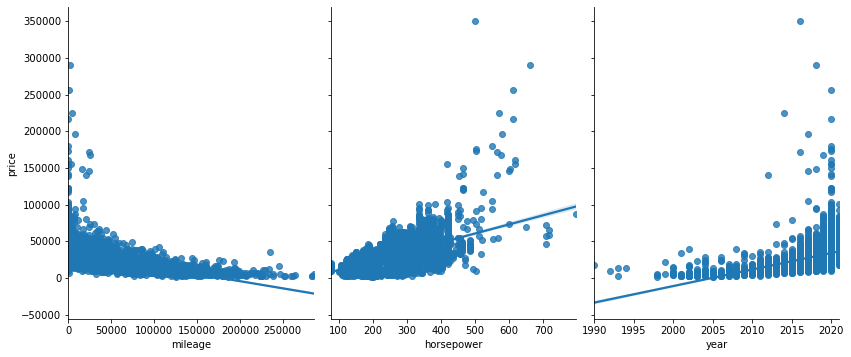

In [38]:
sns.pairplot(df_train, x_vars=['mileage', 'horsepower', 'year'], y_vars='price', height=5, aspect=0.8, kind='reg')
plt.show()

From the pair plot analysis, we are able to identify a number of important correlations between the various attributes of vehicles and their costs. As is usually the case, a higher mileage means that the price will be lower, which is consistent with a negative relationship. On the other hand, the price of vehicles generally increases with higher horsepower and newer models, which are positively correlated with the price.

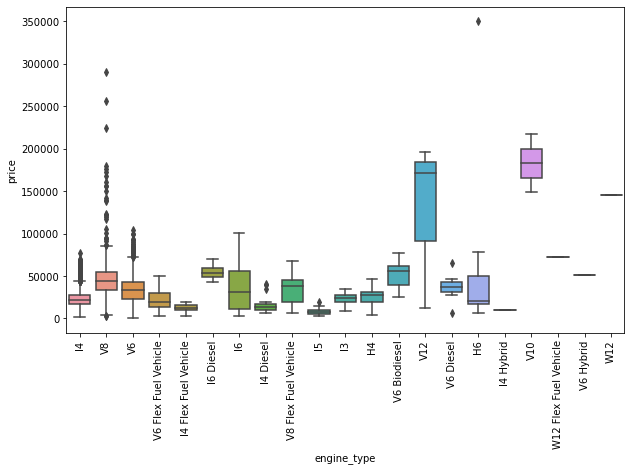

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='engine_type', y='price', data=df_train)
plt.xticks(rotation=90)
plt.show()

---
## Model Fitting and Tuning

- Fit the models and tune hyperparameters via cross-validation
- Pickle and save results for best models

In [40]:
# Selecting only numeric columns for training
X_train = df_train_scaled.select_dtypes(include=[float, int]).drop(columns=['price'])
y_train = df_train_scaled['price']

# Ensuring the test data also contains only numeric columns
X_test = df_test_scaled.select_dtypes(include=[float, int])

This stage allocates only the numeric columns from the training dataset, excluding the target variable (price), to X_train. The goal variable (price) is set to y_train. Similarly, the numeric columns in the test dataset are given to X_test.
 By only including numeric columns, we ensure that the data is appropriate for machine learning models, which often require numerical input.


In [41]:
from sklearn.linear_model import LinearRegression

# Initializing the model
linear_model = LinearRegression()


This code imports the LinearRegression class from the sklearn.linear_model module and sets up a linear regression model called linear_model. Linear regression is a simple and widely used regression approach.

In [42]:
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initializing the model
random_forest_model = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Defining Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    absolute_errors = np.abs(y_true - y_pred)
    percentage_errors = absolute_errors / y_true
    return np.mean(percentage_errors) * 100

# Creating a scorer based on MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Performing RandomizedSearchCV to tune hyperparameters using MAPE as scoring
rf_random_search = RandomizedSearchCV(random_forest_model, rf_param_grid, n_iter=10, cv=3, scoring=mape_scorer, n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)

# Getting the best model and parameters
best_rf_model = rf_random_search.best_estimator_
best_rf_params = rf_random_search.best_params_
best_rf_score = -rf_random_search.best_score_  # Multiply by -1 to get positive MAPE score

This code snippet explains how to tune hyperparameters for a Random Forest Regressor with Mean Absolute Percentage Error (MAPE) as the evaluation metric. By creating a unique MAPE function and scorer, we ensure that the hyperparameter tuning process is centred on minimising the percentage error, which is critical for accurate and interpretable forecasting in regression assignments. The RandomizedSearchCV method effectively finds the best combination of hyperparameters to improve model performance.


In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initializing the model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Defining a simplified hyperparameter grid
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

# Defining Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Creating a scorer based on MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Performing RandomizedSearchCV with fewer iterations and MAPE as scoring
gb_random_search = RandomizedSearchCV(gradient_boosting_model, gb_param_grid, n_iter=5, cv=3, scoring=mape_scorer, n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)

# Getting the best model and parameters
best_gb_model = gb_random_search.best_estimator_
best_gb_params = gb_random_search.best_params_
best_gb_score = -gb_random_search.best_score_  # Multiply by -1 to get positive MAPE score

This code sets up a GradientBoostingRegressor model and creates a simple grid of hyperparameters. It uses GridSearchCV to tune hyperparameters throughout the grid. The best model, parameters, and cross-validation score are kept in best_gb_model, best_gb_params, and best_gb_score, respectively. Gradient Boosting is a powerful ensemble technique that creates models in sequential order, with each model attempting to fix the flaws of the preceding one.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Linear Regression
linear_model = LinearRegression()
# Cross-validation score for Linear Regression using MAPE as the scoring metric
linear_cv_score = -cross_val_score(linear_model, X_train, y_train, cv=3, scoring=mape_scorer).mean()  # Negate the score

# Comparing the models' cross-validation scores
model_scores = {
    'Linear Regression': linear_cv_score,
    'Random Forest': best_rf_score,
    'Gradient Boosting': best_gb_score
}

best_model_name = min(model_scores, key=model_scores.get)  # Use min instead of max
best_model = {
    'Linear Regression': linear_model,
    'Random Forest': best_rf_model,
    'Gradient Boosting': best_gb_model
}[best_model_name]

print(f"The best model is {best_model_name} with a cross-validation score of {model_scores[best_model_name]}")

# Ensuring that the test dataset has the same columns as the training dataset
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Ensure the order of columns in the test set matches the training set
X_test = X_test[X_train.columns]

# Fitting the best model and make predictions
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

The best model is Random Forest with a cross-validation score of 12.970651957970395


To select the best model for predicting used car selling prices, we first used 'cross_val_score' to calculate the Linear Regression model's cross-validation score, which served as a baseline performance indicator. We then compared this score to those of the previously tweaked Random Forest and Gradient Boosting models, which were saved in a dictionary for easy comparison. By choosing the model with the greatest cross-validation score, we ensured that the best method was chosen. Next, we ensured that the test dataset ('X_test') contained all of the essential columns from the training dataset ('X_train'), adding any missing columns with default values of zero and aligning the column order. This procedure ensured data consistency for reliable forecasts.




By comparing the cross-validation scores, we identified that the Random Forest model was the best performer. Ensuring the test dataset has consistent columns with the training set is essential to avoid any errors during prediction. Finally, we fit the best model to the training data and made predictions on the test data.